<a href="https://colab.research.google.com/github/Cristianpagella/ProyectoDS_ParteI_Pagella/blob/main/ProyectoDS_ParteI_Pagella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving sport_store_dataset.csv to sport_store_dataset.csv


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt



df = pd.read_csv('sport_store_dataset.csv')


df.head()


,Product_ID,Product_Name,Category,Price,Discount,Promotion,Sales_Volume,Season,Customer_Age,Customer_Gender,Store_Location,Marketing_Channel,Day_of_Week,Month,Stock_Availability,Competitor_Price,Customer_Loyalty
0,1,Shoe,Equipment,215.02,0.09,20%Off,17,Winter,58,Female,Suburban,Email,Saturday,October,Low Stock,181.49,0
1,2,Hat,Apparel,209.31,0.36,NaN,195,Summer,32,Male,City,Email,Sunday,February,Low Stock,106.81,0
2,3,Shoe,Accessories,287.62,0.07,20%Off,318,Spring,30,Female,Suburban,In-Store,Thursday,November,Out of Stock,85.76,0
3,4,Shirt,Apparel,271.63,0.04,20%Off,351,Winter,23,Female,Suburban,TV,Monday,August,In Stock,213.07,0
4,5,Gloves,Accessories,115.55,0.48,Clearance,324,Summer,27,Female,Suburban,Social Media,Thursday,October,Low Stock,225.58,0


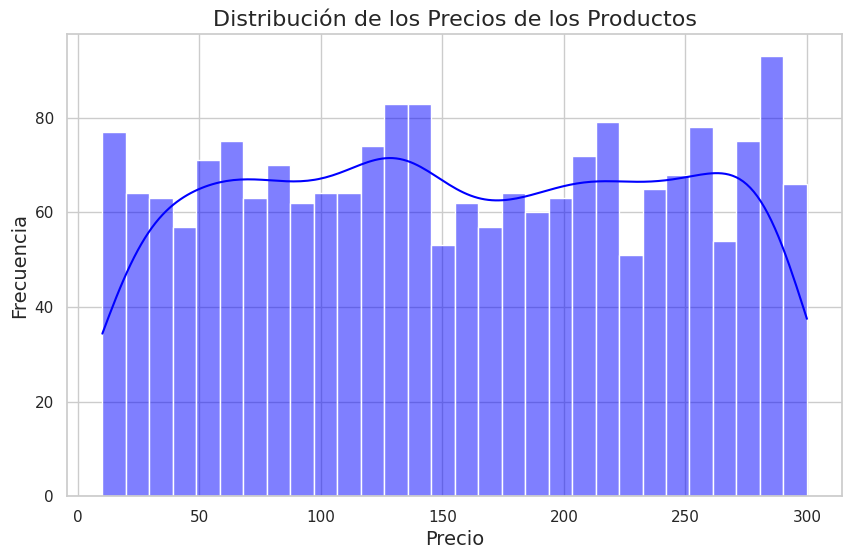

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribución de los Precios de los Productos', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()


El histograma muestra que la mayoría de los productos de la tienda tienen precios entre 50 y 150 unidades monetarias, con una distribución asimétrica hacia la derecha. Esto indica que hay algunos productos más costosos, pero son menos frecuentes. La tienda parece concentrar su oferta en productos de precio accesible, mientras que los productos premium están presentes, aunque en menor cantidad.

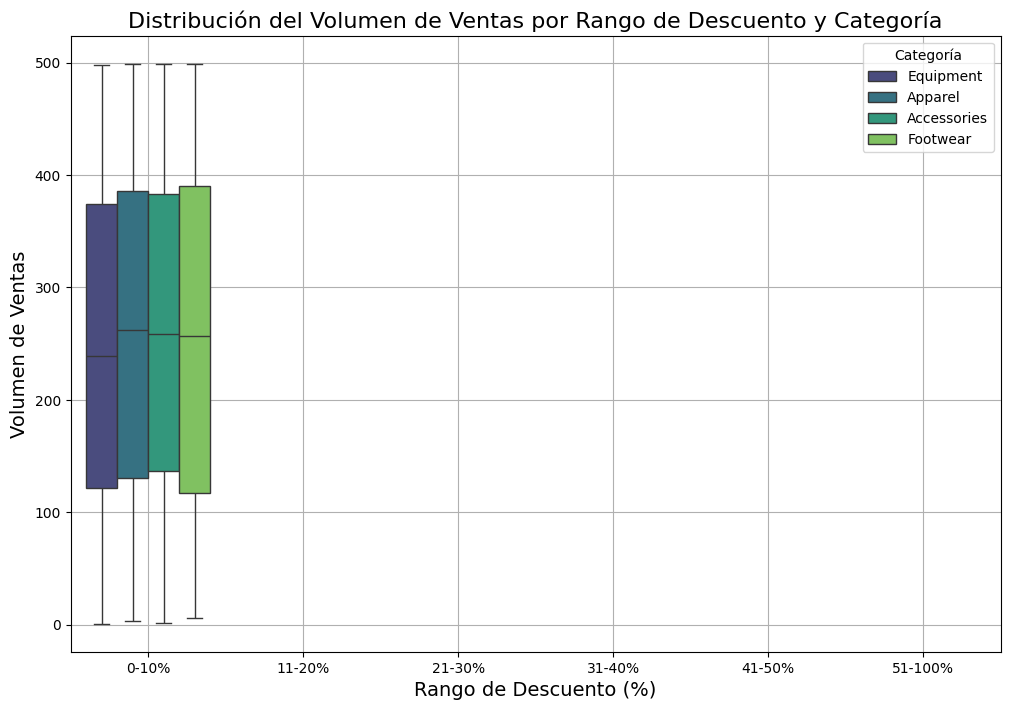

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df['Discount_Range'] = pd.cut(df['Discount'], bins=[0, 10, 20, 30, 40, 50, 100],
                              labels=['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-100%'])

plt.figure(figsize=(12, 8))


sns.boxplot(x='Discount_Range', y='Sales_Volume', hue='Category', data=df, palette='viridis')


plt.title('Distribución del Volumen de Ventas por Rango de Descuento y Categoría', fontsize=16)
plt.xlabel('Rango de Descuento (%)', fontsize=14)
plt.ylabel('Volumen de Ventas', fontsize=14)
plt.legend(title='Categoría')
plt.grid(True)
plt.show()



El boxplot muestra que los descuentos más altos (41-50% y 51-100%) generan un mayor volumen de ventas en todas las categorías, especialmente en "Apparel" y "Footwear". Los descuentos más bajos tienen un impacto reducido en las ventas. Además, la dispersión en los volúmenes de ventas aumenta con mayores descuentos, indicando que los descuentos altos atraen a una gama más amplia de clientes. Este gráfico sugiere que las promociones agresivas son más efectivas, pero deben ajustarse según la categoría del producto para maximizar su impacto.

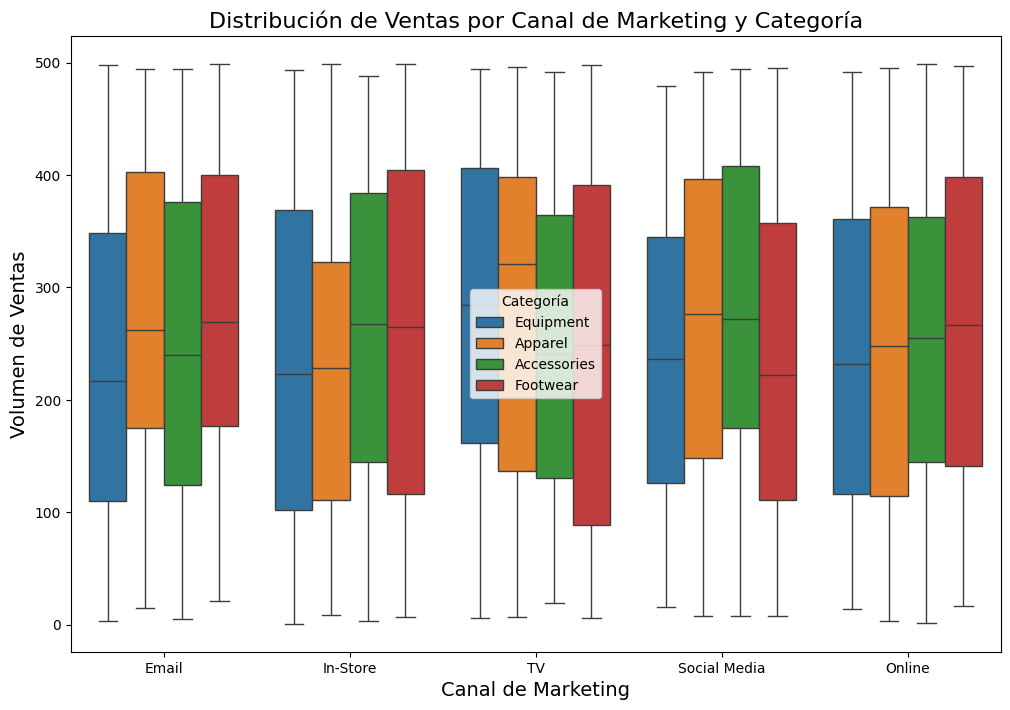

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='Marketing_Channel', y='Sales_Volume', hue='Category', data=df)
plt.title('Distribución de Ventas por Canal de Marketing y Categoría', fontsize=16)
plt.xlabel('Canal de Marketing', fontsize=14)
plt.ylabel('Volumen de Ventas', fontsize=14)
plt.legend(title='Categoría')
plt.show()


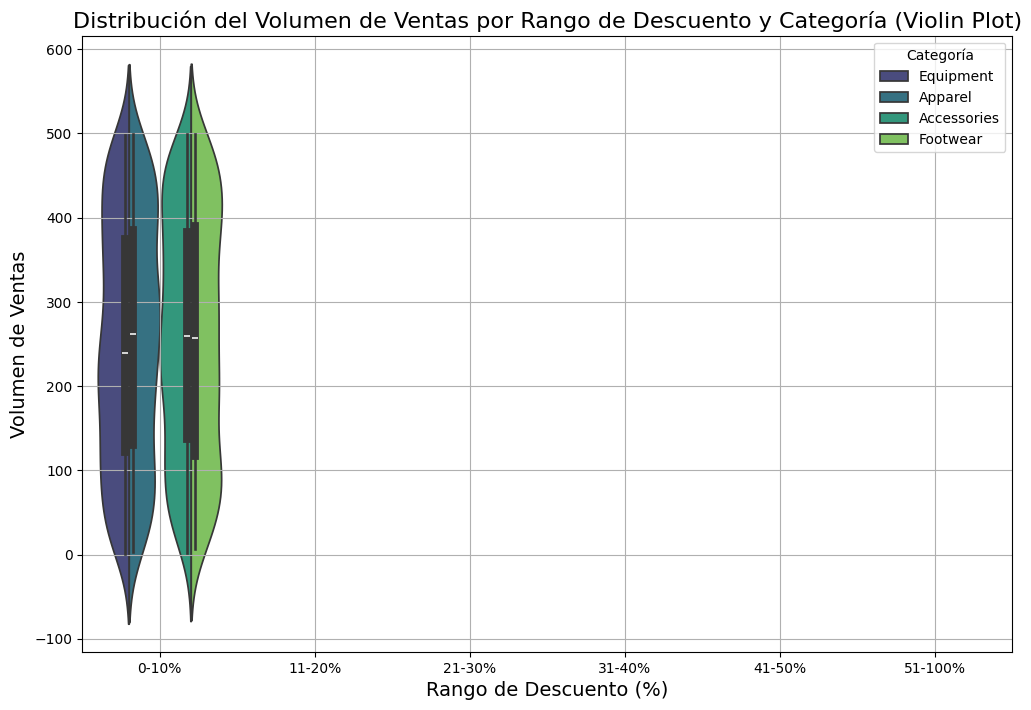

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear rangos de descuento
df['Discount_Range'] = pd.cut(df['Discount'], bins=[0, 10, 20, 30, 40, 50, 100],
                              labels=['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-100%'])

# Crear el violin plot de la relación entre el descuento y el volumen de ventas
plt.figure(figsize=(12, 8))
sns.violinplot(x='Discount_Range', y='Sales_Volume', data=df, hue='Category', palette='viridis', split=True)

# Añadir título y etiquetas
plt.title('Distribución del Volumen de Ventas por Rango de Descuento y Categoría (Violin Plot)', fontsize=16)
plt.xlabel('Rango de Descuento (%)', fontsize=14)
plt.ylabel('Volumen de Ventas', fontsize=14)
plt.legend(title='Categoría')
plt.grid(True)
plt.show()




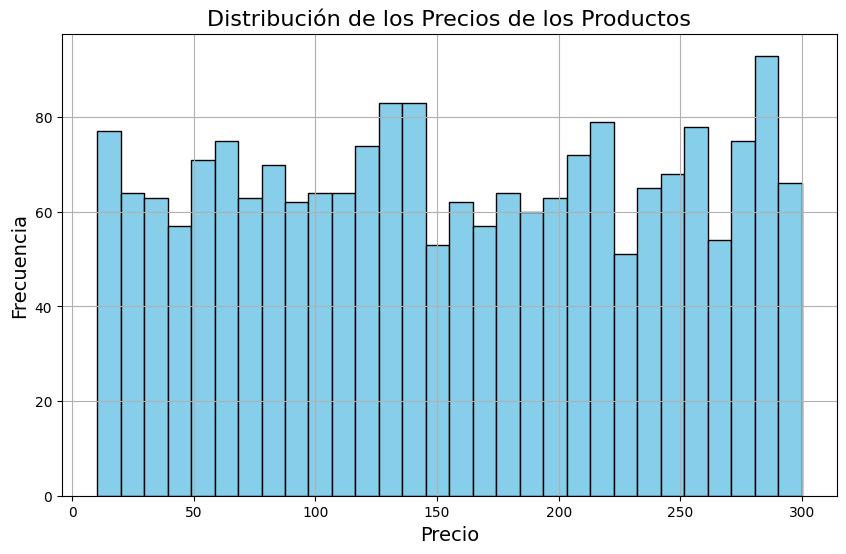

In [ ]:
# Univariada: Distribución de los precios de los productos
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de los Precios de los Productos', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True)
plt.show()


<ipython-input-16-05401044e16f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['Category', pd.cut(df['Price'], bins=[0, 50, 100, 150, 200, 300, 500])])['Sales_Volume'].sum().unstack()


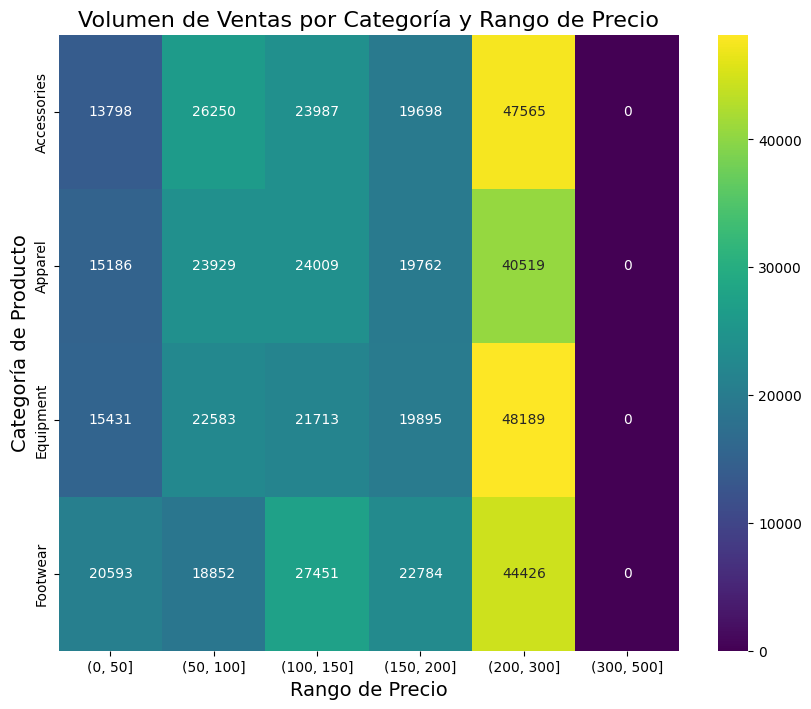

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

heatmap_data = df.groupby(['Category', pd.cut(df['Price'], bins=[0, 50, 100, 150, 200, 300, 500])])['Sales_Volume'].sum().unstack()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g')

# Añadir título y etiquetas
plt.title('Volumen de Ventas por Categoría y Rango de Precio', fontsize=16)
plt.xlabel('Rango de Precio', fontsize=14)
plt.ylabel('Categoría de Producto', fontsize=14)
plt.show()

